In [78]:
import pandas as pd

In [79]:
df_raw = pd.read_csv("EDA_1.csv")

C:\Users\shyam\AppData\Local\Temp\ipykernel_29172\2859214986.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv("EDA_1.csv")


In [80]:
df_raw.columns

Index(['Unnamed: 0', 'Report Number', 'Local Case Number', 'Agency Name',
       'ACRS Report Type', 'Crash Date/Time', 'Route Type', 'Road Name',
       'Cross-Street Name', 'Off-Road Description', 'Municipality',
       'Related Non-Motorist', 'Collision Type', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse', 'Person ID',
       'Driver At Fault', 'Injury Severity', 'Circumstance',
       'Driver Distracted By', 'Drivers License State', 'Vehicle ID',
       'Vehicle Damage Extent', 'Vehicle First Impact Location',
       'Vehicle Body Type', 'Vehicle Movement', 'Vehicle Going Dir',
       'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year',
       'Vehicle Make', 'Vehicle Model', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [81]:
df_raw = df_raw[['Vehicle First Impact Location',
       'Vehicle Body Type', 'Vehicle Movement', 'Vehicle Going Dir',
       'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year',
       'Vehicle Make', 'Vehicle Model', 'Latitude', 'Longitude', 'Location','Driver At Fault']]

In [82]:
df_raw.columns

Index(['Vehicle First Impact Location', 'Vehicle Body Type',
       'Vehicle Movement', 'Vehicle Going Dir', 'Speed Limit',
       'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year', 'Vehicle Make',
       'Vehicle Model', 'Latitude', 'Longitude', 'Location',
       'Driver At Fault'],
      dtype='object')

In [83]:
# to lower case
df_raw=df_raw.applymap(lambda x: str(x).lower() if isinstance(x,str) else x)

C:\Users\shyam\AppData\Local\Temp\ipykernel_29172\2638088557.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_raw=df_raw.applymap(lambda x: str(x).lower() if isinstance(x,str) else x)


In [84]:
# remove null values from this column 156 na found
df_raw = df_raw[df_raw["Vehicle First Impact Location"].notna()]


In [85]:
df_raw = df_raw[df_raw["Driver At Fault"]!="unknown"]

In [86]:
df_raw[df_raw["Vehicle First Impact Location"].isna()]

,Vehicle First Impact Location,Vehicle Body Type,Vehicle Movement,Vehicle Going Dir,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude,Location,Driver At Fault


In [87]:
df_raw["Vehicle First Impact Location"] = df_raw["Vehicle First Impact Location"].str.replace("roof top", "top", regex=True)
df_raw["Vehicle First Impact Location"] = df_raw["Vehicle First Impact Location"].str.replace(" ", "", regex=True)

In [91]:

crosstab_5 = pd.crosstab(df_raw["Vehicle First Impact Location"], df_raw["Driver At Fault"])
crosstab_5["Y_Percentage"] = crosstab_5["yes"]/(crosstab_5["yes"]+crosstab_5["no"])
crosstab_5.sort_values(by="Y_Percentage", ascending=False)

Driver At Fault,no,yes,Y_Percentage
Vehicle First Impact Location,,,
unknown,172,2701,0.940132
underside,113,454,0.800705
twelveoclock,20715,49957,0.706885
oneoclock,6089,11165,0.647096
top,167,282,0.628062
non-collision,200,319,0.614644
fouroclock,1692,2662,0.611392
twooclock,2578,3927,0.603689
fiveoclock,1829,2564,0.583656


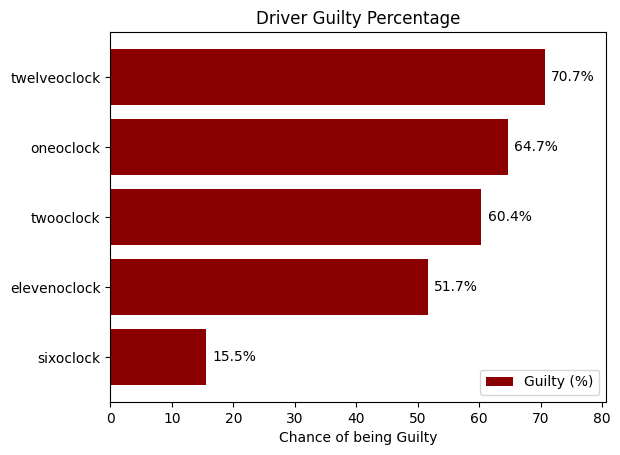

In [97]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the percentage of "Yes" (Guilty) for each state
crosstab_5["Yes_Percentage"] = (crosstab_5["yes"] / (crosstab_5["yes"] + crosstab_5["no"])) * 100

# Sort by the number of "Yes" (Guilty) in descending order
crosstab_8 = crosstab_5.sort_values(by="yes", ascending=False)

# Select the top 5 states with the most "Yes" counts
top_5 = crosstab_8.head(5)

# Sort the top 5 by 'Yes_Percentage' in descending order
top_5 = top_5.sort_values(by="Yes_Percentage", ascending=True)

# Prepare data for plotting
categories = list(top_5.index)
yes_ratios = top_5["Yes_Percentage"]  # Percentages for 'Yes'

# Convert categories to positions
x_indices = np.arange(len(categories))

# Plot
plt.barh(x_indices, yes_ratios, color='darkred', label='Guilty (%)')

# Adjust x-axis limits to accommodate annotations
plt.xlim(0, max(yes_ratios) + 10)  # Add padding to the right

# Annotate each bar with its percentage
for i, v in enumerate(yes_ratios):
    plt.text(v + 1, i, f"{v:.1f}%", va='center', fontsize=10, color='black')  # Add text slightly to the right of the bar

# Labels and Title
plt.yticks(x_indices, categories)
plt.xlabel('Chance of being Guilty')
plt.title('Driver Guilty Percentage')

plt.legend()
plt.show()

In [18]:
df_raw["Vehicle Movement"].value_counts()

Vehicle Movement
moving constant speed      70710
slowing or stopping        25887
stopped in traffic lane    18285
making left turn           15954
accelerating               10289
backing                     6184
making right turn           5206
changing lanes              5066
starting from lane          4337
parked                      2959
unknown                     2505
parking                     1904
starting from parked        1829
turning left                1630
stopped in traffic          1200
making u turn               1191
entering traffic lane       1138
passing                      929
other                        875
negotiating a curve          721
skidding                     676
right turn on red            260
leaving traffic lane         253
overtaking/passing           179
making u-turn                145
driverless moving veh.        35
Name: count, dtype: int64

In [99]:
df_raw["Vehicle Movement"] = df_raw["Vehicle Movement"].str.replace("making u-turn", "making u turn", regex=True)
df_raw["Vehicle Movement"] = df_raw["Vehicle Movement"].str.replace("parking", "parked", regex=True)
crosstab_5 = pd.crosstab(df_raw["Vehicle Movement"], df_raw["Driver At Fault"])
crosstab_5["Y_Percentage"] = crosstab_5["yes"]/(crosstab_5["yes"]+crosstab_5["no"])
crosstab_5.sort_values(by="yes", ascending=False)


Driver At Fault,no,yes,Y_Percentage
Vehicle Movement,,,
moving constant speed,35106,35604,0.503521
making left turn,3099,12855,0.805754
slowing or stopping,14609,11278,0.435663
accelerating,2818,7471,0.726115
backing,580,5604,0.906210
changing lanes,539,4527,0.893604
making right turn,1160,4046,0.777180
starting from lane,1765,2572,0.593037
unknown,204,2301,0.918563


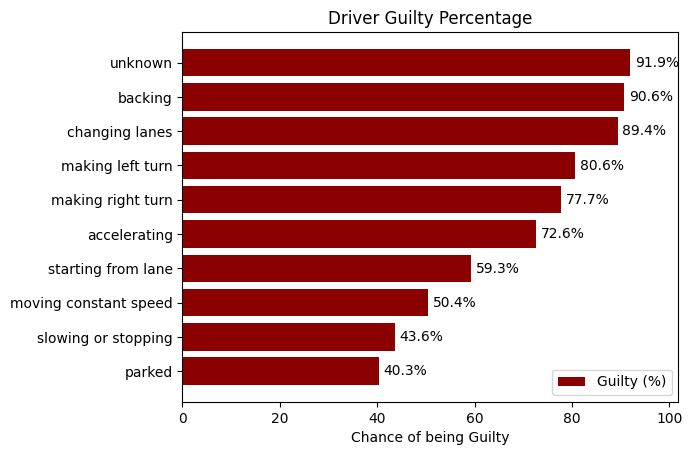

In [101]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the percentage of "Yes" (Guilty) for each state
crosstab_5["Yes_Percentage"] = (crosstab_5["yes"] / (crosstab_5["yes"] + crosstab_5["no"])) * 100

# Sort by the number of "Yes" (Guilty) in descending order
crosstab_8 = crosstab_5.sort_values(by="yes", ascending=False)

# Select the top 5 states with the most "Yes" counts
top_5 = crosstab_8.head(10)

# Sort the top 5 by 'Yes_Percentage' in descending order
top_5 = top_5.sort_values(by="Yes_Percentage", ascending=True)

# Prepare data for plotting
categories = list(top_5.index)
yes_ratios = top_5["Yes_Percentage"]  # Percentages for 'Yes'

# Convert categories to positions
x_indices = np.arange(len(categories))

# Plot
plt.barh(x_indices, yes_ratios, color='darkred', label='Guilty (%)')

# Adjust x-axis limits to accommodate annotations
plt.xlim(0, max(yes_ratios) + 10)  # Add padding to the right

# Annotate each bar with its percentage
for i, v in enumerate(yes_ratios):
    plt.text(v + 1, i, f"{v:.1f}%", va='center', fontsize=10, color='black')  # Add text slightly to the right of the bar

# Labels and Title
plt.yticks(x_indices, categories)
plt.xlabel('Chance of being Guilty')
plt.title('Driver Guilty Percentage')

plt.legend()
plt.show()

In [56]:
crosstab_5

Driver At Fault,no,yes,Y_Percentage
Vehicle Movement,,,
accelerating,2818,7471,0.726115
backing,580,5604,0.906210
changing lanes,539,4527,0.893604
driverless moving veh.,0,35,1.000000
entering traffic lane,245,893,0.784710
leaving traffic lane,48,205,0.810277
making left turn,3099,12855,0.805754
making right turn,1160,4046,0.777180
making u turn,131,1060,0.890008


In [66]:
crosstab_5 = pd.crosstab(df_raw["Vehicle Movement"], df_raw["Vehicle First Impact Location"])
# crosstab_5["Y_Percentage"] = crosstab_5["yes"]/(crosstab_5["yes"]+crosstab_5["no"])
# crosstab_5.sort_values(by="yes", ascending=False)

In [67]:
crosstab_5

Vehicle First Impact Location,cargoloss,eightoclock,elevenoclock,fiveoclock,fouroclock,nineoclock,non-collision,oneoclock,sevenoclock,sixoclock,tenoclock,threeoclock,top,twelveoclock,twooclock,underside,unknown,vehiclenotatscene
Vehicle Movement,,,,,,,,,,,,,,,,,,
accelerating,1,226,992,215,297,281,36,1107,189,492,395,306,41,5062,396,43,147,63
backing,0,66,140,569,98,39,34,177,453,3973,70,54,17,72,59,17,205,141
changing lanes,0,208,782,256,228,130,27,931,330,249,376,148,3,738,377,6,187,90
driverless moving veh.,0,0,3,0,2,0,0,1,0,11,1,0,0,14,1,1,1,0
entering traffic lane,1,33,237,16,29,51,8,103,41,78,72,33,1,375,31,1,9,19
leaving traffic lane,0,1,29,10,4,4,1,47,3,9,10,7,0,104,13,4,4,3
making left turn,0,595,1591,673,872,527,50,2478,345,604,679,737,8,5501,1091,28,175,0
making right turn,0,89,869,206,336,79,21,541,142,499,213,229,20,1600,216,30,116,0
making u turn,0,62,202,45,35,75,8,204,43,125,80,32,1,328,53,11,23,9
